# here, another attempt of performing a multilabbelling

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('ML_prepared.csv')
df

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Age_18-24,Age_25-34,Age_35-44,...,Legalh_0,Legalh_1,LSD_0,LSD_1,Meth_0,Meth_1,Mushrooms_0,Mushrooms_1,Nicotine_0,Nicotine_1
0,-0.679435,1.943848,1.441121,0.762842,-0.142741,-0.752913,-0.221197,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,-0.468029,0.807218,-0.850379,-1.625666,-1.016636,-1.453411,0.419536,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,-0.148987,-0.808426,-0.019129,0.591826,0.586726,-1.453411,-1.223036,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.736985,-1.637866,-0.453265,-0.302804,1.309747,-0.235174,-0.221197,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.679435,-0.301268,-1.561014,2.045171,1.635314,-1.453411,-1.604778,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,-1.196478,1.745375,1.892644,0.762842,-1.140322,0.915524,1.997673,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1880,-0.246845,1.745375,0.585797,0.762842,-1.521787,0.915524,0.797313,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1881,1.135109,-1.380176,-1.280249,-1.777188,-1.388076,0.547363,-0.543188,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1882,0.912802,-1.926959,0.294743,-1.625666,-2.579097,1.346236,1.274102,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0


In [18]:
to_drop = [col for col in df.columns if col.endswith('0')]
df = df.drop(columns=to_drop)

In [19]:
df.columns = [col.split('_')[0] if col.endswith('_1') else col for col in df.columns]
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65+', 'Gender_F', 'Gender_M', 'Education_basic',
       'Education_fairly', 'Education_higher', 'Country_Australia',
       'Country_Canada', 'Country_New Zealand', 'Country_Other',
       'Country_Republic of Ireland', 'Country_UK', 'Country_USA', 'Amphet',
       'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Ecstasy', 'Heroin', 'Ketamine',
       'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine'],
      dtype='object')

In [20]:
df = df.drop(columns=['Gender_F', 'Nicotine'])
df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65+', 'Gender_M', 'Education_basic', 'Education_fairly',
       'Education_higher', 'Country_Australia', 'Country_Canada',
       'Country_New Zealand', 'Country_Other', 'Country_Republic of Ireland',
       'Country_UK', 'Country_USA', 'Amphet', 'Amyl', 'Benzos', 'Cannabis',
       'Coke', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms'],
      dtype='object')

In [22]:
df['user'] = df[['Amphet', 'Amyl', 'Benzos',
       'Coke', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth',
       'Mushrooms']].apply(lambda x: max(x), axis=1)

df['user']

0       1.0
1       1.0
2       1.0
3       1.0
4       0.0
       ... 
1879    1.0
1880    1.0
1881    1.0
1882    1.0
1883    1.0
Name: user, Length: 1884, dtype: float64

In [24]:
print(df['user'].value_counts())
print(len(df))

user
1.0    1175
0.0     709
Name: count, dtype: int64
1884


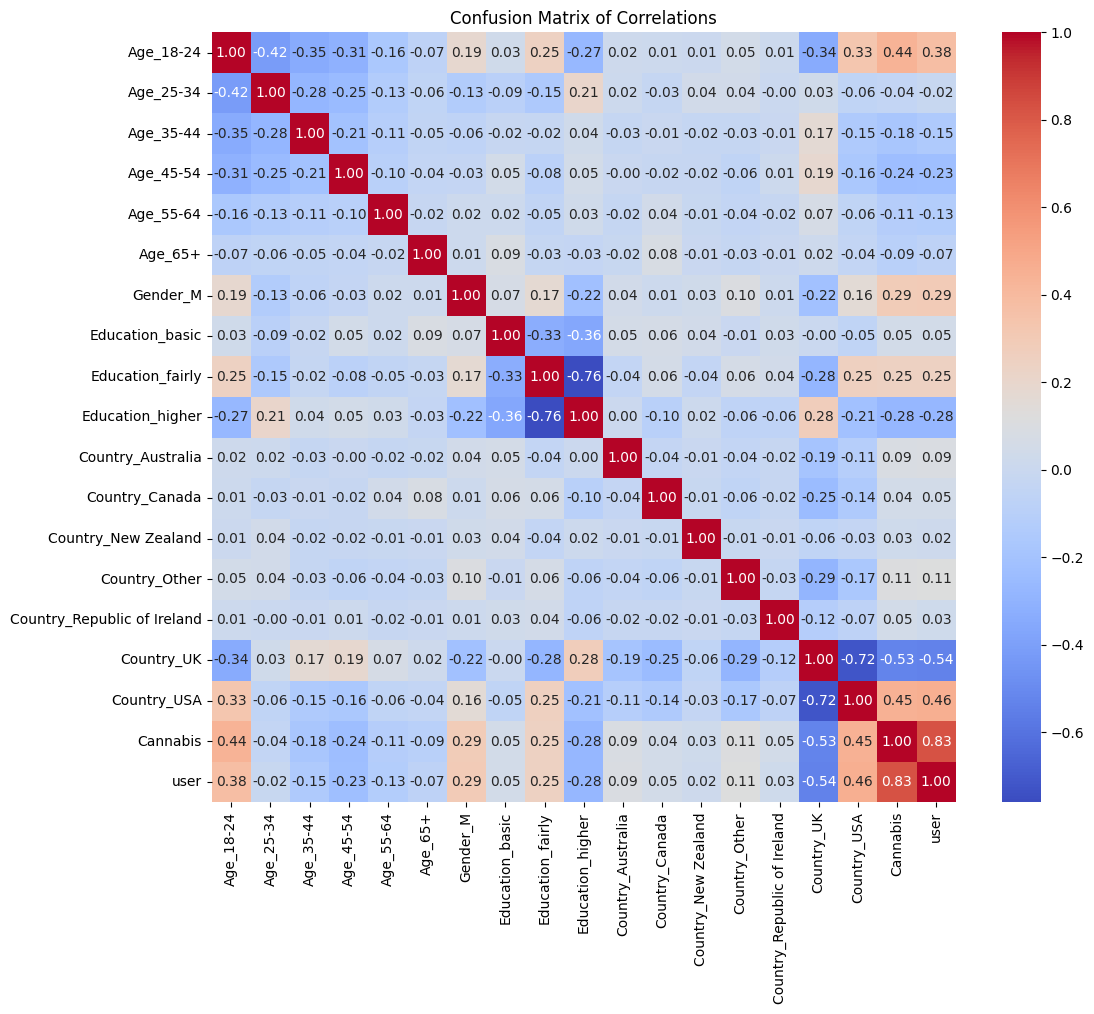

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# List of feature columns for correlation analysis
feature_columns = [
    'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64', 'Age_65+',
    'Gender_M', 'Education_basic', 'Education_fairly', 'Education_higher',
    'Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other',
    'Country_Republic of Ireland', 'Country_UK', 'Country_USA'
]

# Computing the Spearman correlation matrix
corr_matrix = df[feature_columns + ['Cannabis', 'user']].corr(method='spearman')
# corr_matrix = df.corr(method='spearman')


# Plotting the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Confusion Matrix of Correlations')
plt.show()

In [29]:
# combine countries except uk and usa

df['Country_Other'] = df[['Country_Australia', 'Country_Canada', 'Country_New Zealand', 'Country_Other',
    'Country_Republic of Ireland']].apply(lambda x: max(x), axis=1)


0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1879    0.0
1880    0.0
1881    0.0
1882    0.0
1883    1.0
Name: Country_Other, Length: 1884, dtype: float64

In [30]:
df = df.drop(columns=['Country_Australia', 'Country_Canada', 'Country_New Zealand',
    'Country_Republic of Ireland'])

df.columns

Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65+', 'Gender_M', 'Education_basic', 'Education_fairly',
       'Education_higher', 'Country_Other', 'Country_UK', 'Country_USA',
       'Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'user'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

# We are removing all of the cannabis column from further experiments

X = df.drop(columns=['Amphet', 'Amyl', 'Benzos', 'Cannabis', 'Coke', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'user'])
y = df[['Amphet', 'Amyl', 'Benzos', 'Coke', 'Ecstasy', 'Heroin',
       'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
np.random.seed(0)
tf.random.set_seed(0)
# Define your model architecture
from tensorflow.keras.layers import LeakyReLU

# model = Sequential([
#     Dense(48, input_dim=X_train.shape[1]),
#     LeakyReLU(alpha=0.01),
#     Dense(32),
#     LeakyReLU(alpha=0.01),
#     Dense(16),
#     LeakyReLU(alpha=0.01),
#     Dense(y_train.shape[1], activation='softmax')  # Softmax is typically appropriate for the output layer
# ])

model = Sequential([
    Dense(48, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(y_train.shape[1], activation='softmax')]) 

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['f1_score'])

# Train the model with class weights
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Include early stopping in the model's fit method
history = model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=5, 
    verbose=1, 
    validation_split=0.15, 
    callbacks=[early_stopping]
)

Epoch 1/200


c:\Users\maxsz\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - f1_score: 0.0569 - loss: 6.7097 - val_f1_score: 0.0712 - val_loss: 39.7867
Epoch 2/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1242 - loss: 123.3205 - val_f1_score: 0.0851 - val_loss: 552.2973
Epoch 3/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1373 - loss: 1223.4042 - val_f1_score: 0.0415 - val_loss: 2983.7119
Epoch 4/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - f1_score: 0.1268 - loss: 4989.8608 - val_f1_score: 0.0528 - val_loss: 7445.5684
Epoch 5/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - f1_score: 0.1179 - loss: 12216.1094 - val_f1_score: 0.0600 - val_loss: 15973.5029
Epoch 6/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1267 - loss: 24401.4258 - val_f1_score: 0.0497 - val_loss: 27225.4492
Epoch 7/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1157 - loss: 42069.5625 - val_f1_score: 0.0516 - val_loss: 45910.1523
Epoch 8/200
256/256 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - f1_score: 0.1